In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Dados das vendas
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

In [4]:
# Criar DataFrame
df_vendas = pd.DataFrame(dados_vendas)

In [5]:
# Adicionar uma coluna com o número do mês
df_vendas['mes_numero'] = range(1, 13)

In [6]:
df_vendas.head(12)

,mes,vendas,mes_numero
0,Janeiro,2000,1
1,Fevereiro,2200,2
2,Março,2300,3
3,Abril,2500,4
4,Maio,2600,5
5,Junho,2700,6
6,Julho,2800,7
7,Agosto,2900,8
8,Setembro,3000,9
9,Outubro,3100,10


In [7]:
# Dividir conjunto entre treino e teste
X = df_vendas[['mes_numero']]
y = df_vendas['vendas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Treinar o algoritmo de Regressão Linear
model = LinearRegression().fit(X_train, y_train)

In [9]:
# Gerar predições do conjunto de testes com base no modelo
y_pred = model.predict(X_test)

In [44]:
# R2 Score - Conjunto de Treinamento
model.score(X_train, y_train)

0.9900187149095445

In [45]:
# MSE (Mean Squared Error)
mean_squared_error(y_test, y_pred)

np.float64(4331.065759637179)

In [22]:
# Previsão de vendas para o mês de Dezembro
previsao_dezembro = model.predict(pd.DataFrame([[12]], columns=['mes_numero']))
print(f"Previsão de vendas para Dezembro: {round(previsao_dezembro[0], 2)}")

Previsão de vendas para Dezembro: 3333.33


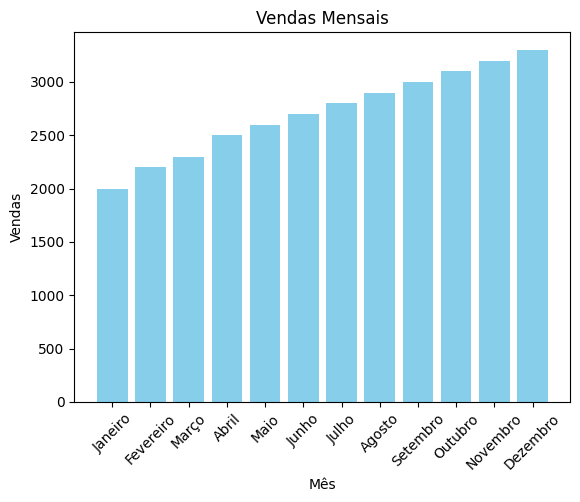

In [41]:
# Gráfico de vendas mensais
plt.bar(dados_vendas['mes'], dados_vendas['vendas'], color='skyblue')
plt.title('Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.show()

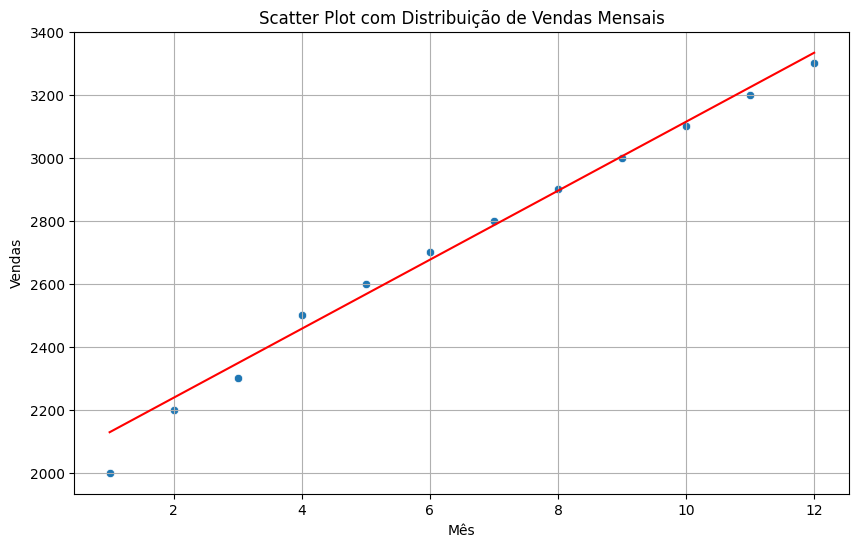

In [43]:
# Scatter Plot com a linha de regressão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mes_numero', y='vendas', data=df_vendas)
plt.plot(df_vendas['mes_numero'], model.predict(df_vendas[['mes_numero']]), color='red')
plt.title('Scatter Plot com Distribuição de Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.grid(True)
plt.show()